In [3]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
def plot_movement_trajectory(file_path):
    
    #get the trial no for the title
    file_name = os.path.basename(file_path)
    trial_no = file_name.split('_')[-1].split('.')[0]


    # Load the data from the CSV file
    movement_data = pd.read_csv(file_path)

    # Extract position coordinates and time
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Create a 2D plot with a trail effect viewed from above (X vs Z) using time for color gradient
    plt.figure(figsize=(10, 8))
    plt.scatter(pos_x, pos_z, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Movement Trajectory with Trail Effect for {trial_no}')
    plt.colorbar(label='Time')
    plt.grid(True)
    plt.show()



In [3]:
def plot_movement_trajectory_with_speed(file_path):


    # get the trial no for the title
    file_name = os.path.basename(file_path)
    trial_no = file_name.split('_')[-1].split('.')[0]

    # Load the data from the CSV file
    movement_data = pd.read_csv(file_path)

    # Extract position coordinates and time
    pos_x = movement_data['pos_x']
    pos_y = movement_data['pos_y']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Calculate distances between consecutive points
    distances = np.sqrt(np.diff(pos_x)**2 + np.diff(pos_y)**2 + np.diff(pos_z)**2)

    # Calculate time differences between consecutive points
    time_diff = np.diff(time)

    # Calculate speed (distance / time)
    speed = distances / time_diff

    # Plot the top-down view of the movement trajectory with trail effect
    plt.figure(figsize=(10, 8))
    plt.scatter(pos_x, pos_z, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Movement Trajectory for {trial_no}')
    plt.colorbar(label='Time')
    plt.grid(True)
    plt.show()

    # Plot the speed over time
    plt.figure(figsize=(10, 6))
    plt.plot(time[:-1], speed, label='Speed')
    plt.xlabel('Time')
    plt.ylabel('Speed')
    plt.title(f'Movement Speed over Time for {trial_no}')
    plt.legend()
    plt.grid(True)
    plt.show()



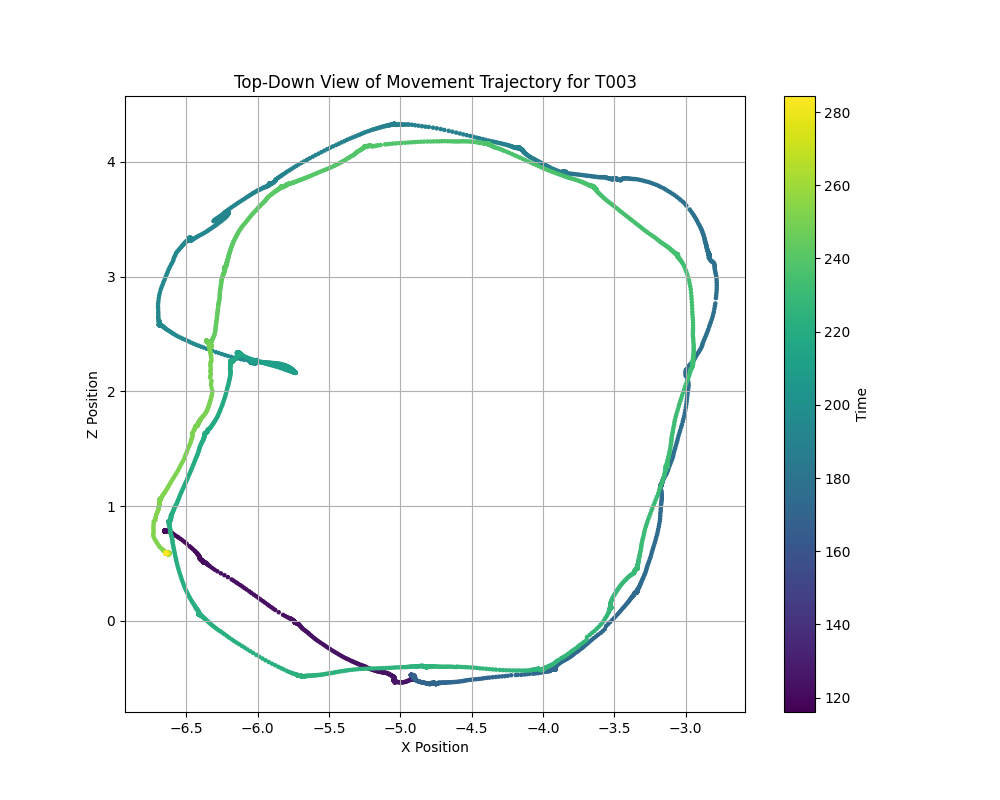

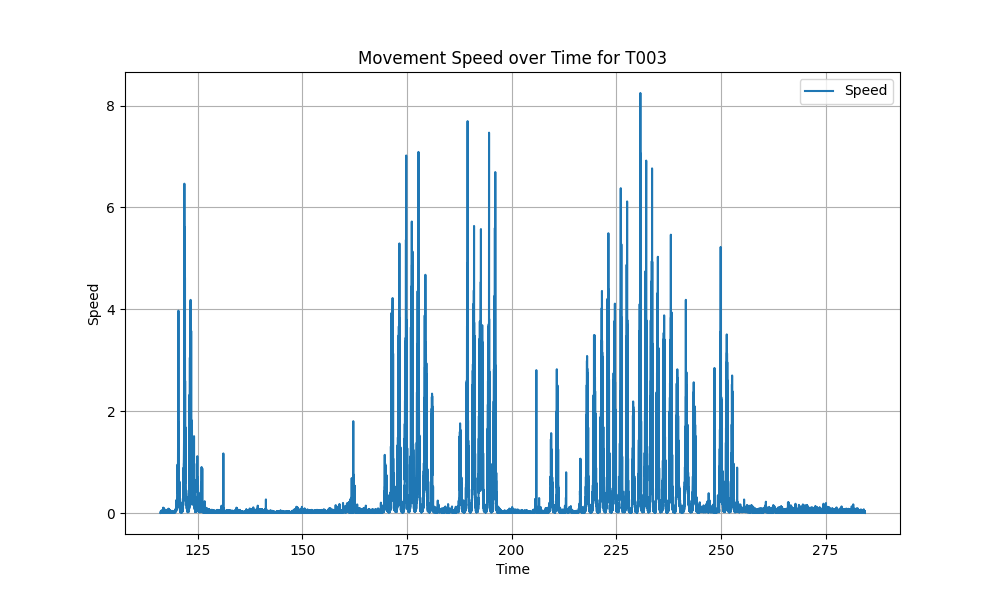

In [4]:
plot_movement_trajectory_with_speed(r'C:\Users\lal\Documents\tez\analysis\vr\vrtracking\trackerR_movement_T003.csv')

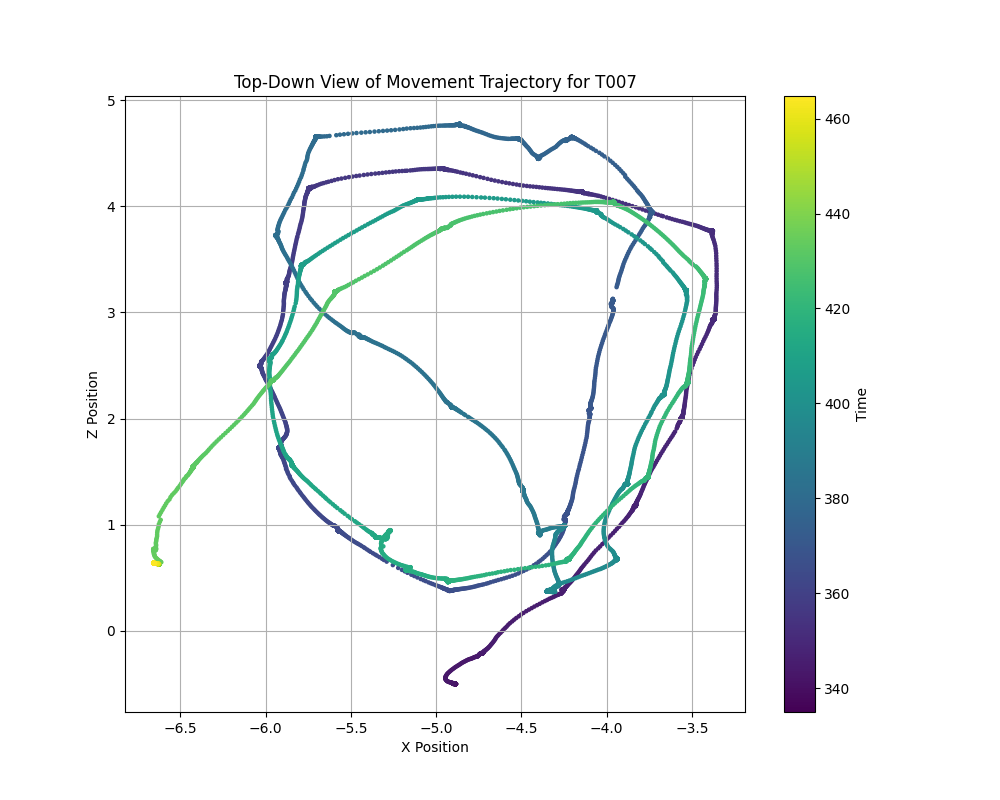

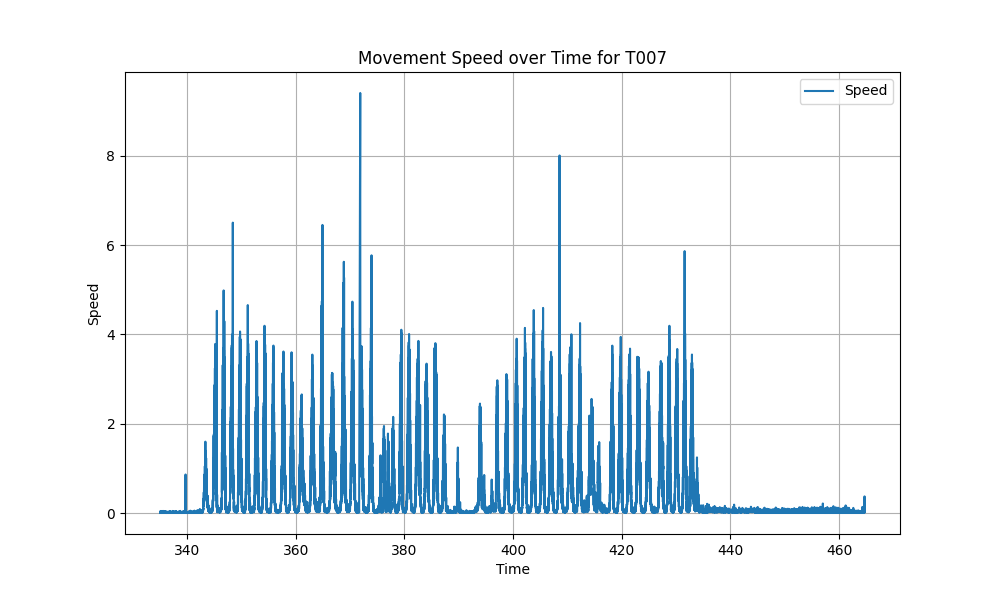

In [5]:
plot_movement_trajectory_with_speed(r'C:\Users\lal\Documents\tez\analysis\vr\vrtracking\trackerR_movement_T007.csv')

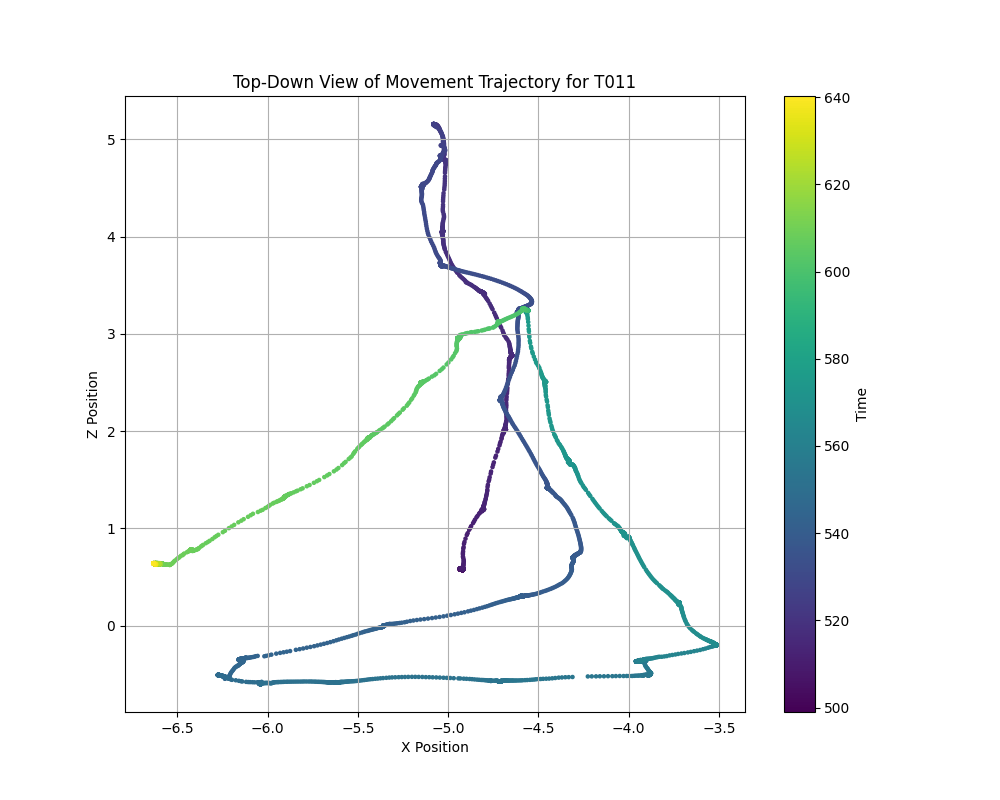

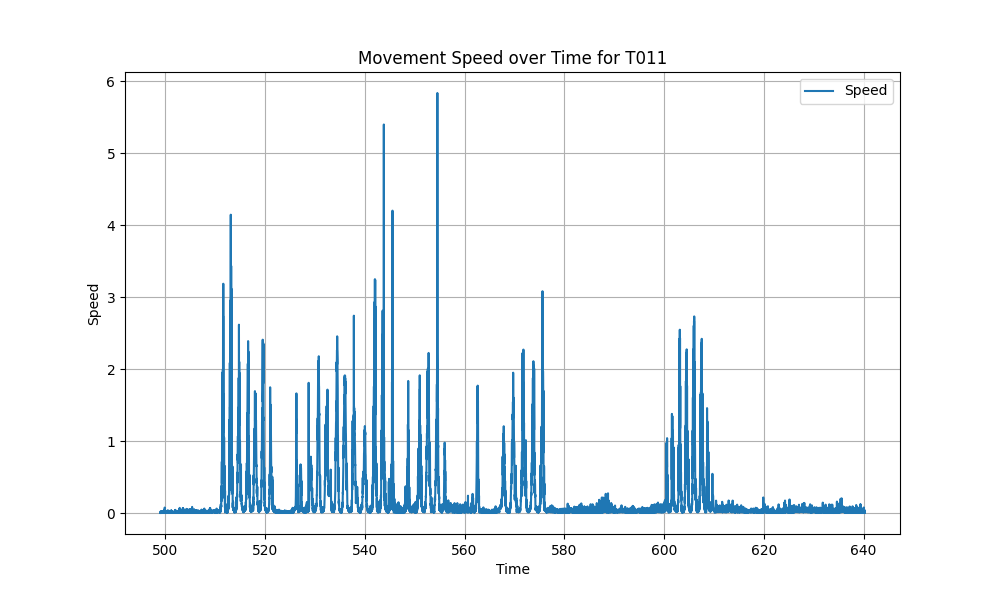

In [6]:
plot_movement_trajectory_with_speed(r'C:\Users\lal\Documents\tez\analysis\vr\vrtracking\trackerR_movement_T011.csv')

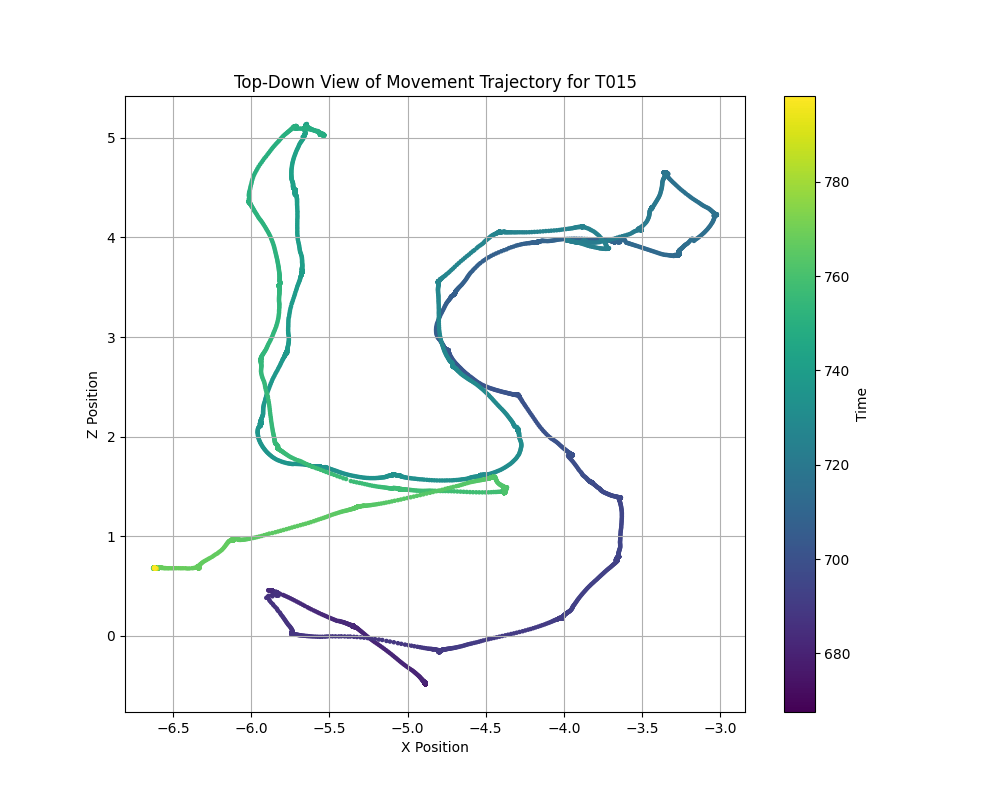

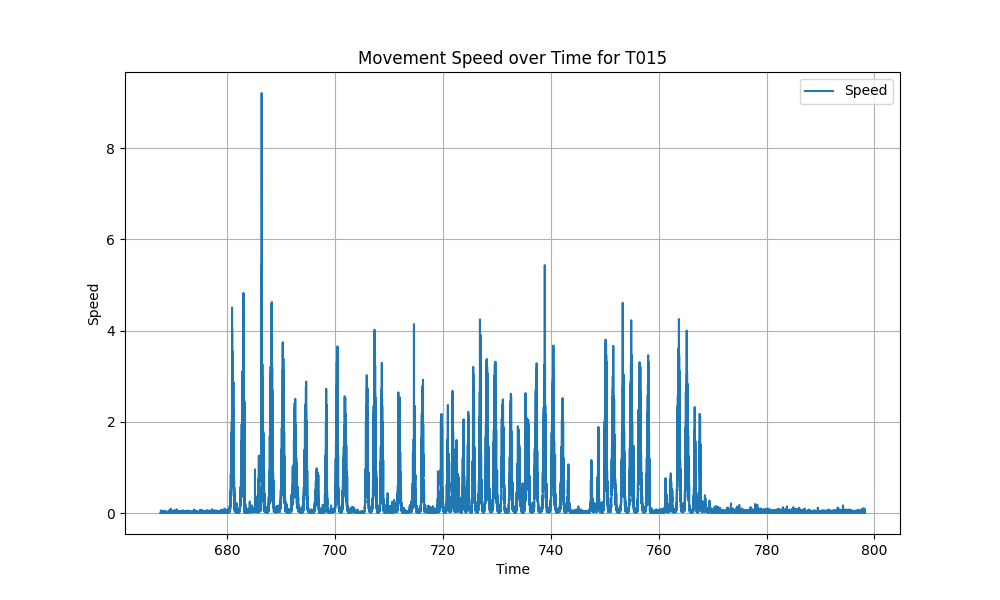

In [7]:
plot_movement_trajectory_with_speed(r'C:\Users\lal\Documents\tez\analysis\vr\vrtracking\trackerR_movement_T015.csv')

Area covered: 40.74%


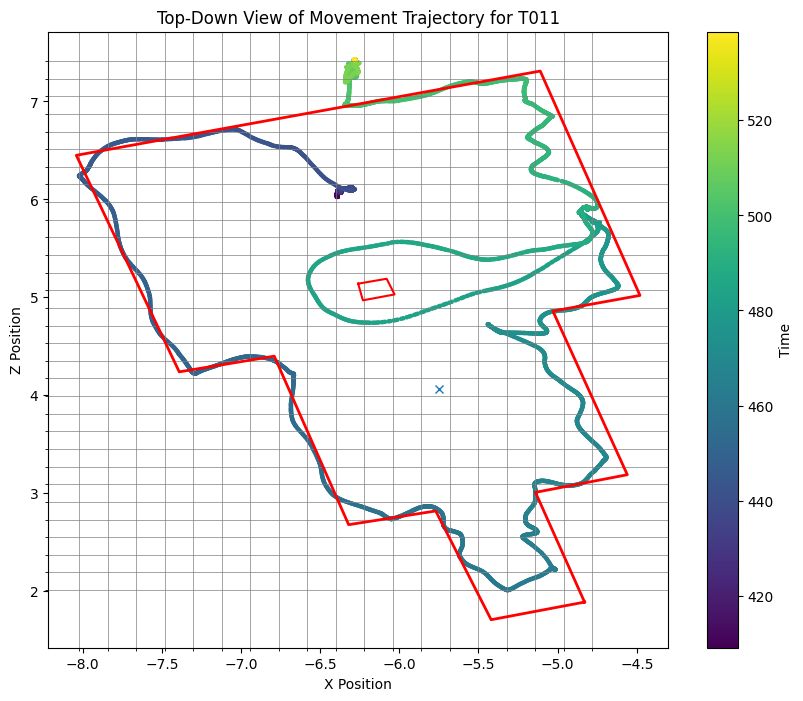

In [1]:
###latest

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def plot_movement_trajectory_with_layout(file_path):
    def draw_elevated_platform(ax):
        # Coordinates from the image
        platform_coords = [
            (-4.83, 1.89), (-5.42, 1.71), (-5.77, 2.82), (-6.32, 2.68),
            (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
            (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),  
        ]
        # Drawing the elevated platform layout
        platform_coords.append(platform_coords[0])  # Close the loop
        xs, ys = zip(*platform_coords)
        ax.plot(xs, ys, 'r-', linewidth=2)
        
        ax.plot(-5.75, 4.06, 'x')  # Center point marked with 'x'  
        
        pillar_coords = [
        (-6.26, 5.14),  # Start here
        (-6.08, 5.19),  # Move right and slightly up
        (-6.03, 5.03),  # Move slightly right and down
        (-6.23, 4.97)   # Move left and slightly down to complete the shape
        ]

        # Drawing the pillars
        pillar_coords.append(pillar_coords[0])  # Close the loop
        pxs, pys = zip(*pillar_coords)
        ax.plot(pxs, pys, 'r-')

        # Calculate the size of the grid based on the pillar coordinates
        pillar_coords = np.array(pillar_coords)
        pillar_size = np.abs(pillar_coords[0] - pillar_coords[1]).max()

        # Get the minimum and maximum coordinates of the trajectory
        x_min, x_max = np.min(pos_x), np.max(pos_x)
        z_min, z_max = np.min(pos_z), np.max(pos_z)

        # Create a grid of lines based on the pillar size
        x_grid = np.arange(x_min, x_max, pillar_size)
        z_grid = np.arange(z_min, z_max, pillar_size)
        ax.set_xticks(x_grid, minor=True)
        ax.set_yticks(z_grid, minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)


        area_covered = calculate_area_covered(pos_x, pos_z, x_grid, z_grid)
        print(f"Area covered: {area_covered:.2f}%")

    def calculate_area_covered(pos_x, pos_z, x_grid, z_grid):
    # Initialize a boolean array to store the squares covered
        squares_covered = np.zeros((len(z_grid)-1, len(x_grid)-1), dtype=bool)

        # Iterate over each segment of the trajectory
        for i in range(len(pos_x) - 1):
            x1, z1 = pos_x[i], pos_z[i]
            x2, z2 = pos_x[i+1], pos_z[i+1]

            # Find the grid squares that the segment passes through
            x_idx1, x_idx2 = np.searchsorted(x_grid, [x1, x2])
            z_idx1, z_idx2 = np.searchsorted(z_grid, [z1, z2])

            # Mark the squares as covered
            if x_idx1 == x_idx2:
                squares_covered[min(z_idx1, z_idx2):max(z_idx1, z_idx2)+1, x_idx1-1:x_idx1+1] = True
            elif z_idx1 == z_idx2:
                squares_covered[z_idx1-1:z_idx1+1, min(x_idx1, x_idx2):max(x_idx1, x_idx2)+1] = True
            else:
                squares_covered[min(z_idx1, z_idx2):max(z_idx1, z_idx2)+1, min(x_idx1, x_idx2):max(x_idx1, x_idx2)+1] = True

        # Calculate the total number of squares and the number of squares covered
        total_squares = (len(z_grid) - 1) * (len(x_grid) - 1)
        covered_squares = np.sum(squares_covered)

        # Calculate the percentage of area covered
        percentage_covered = (covered_squares / total_squares) * 100

        return percentage_covered

    # Extract the scene identifier from the file path
    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    # Load the data from the CSV file
    movement_data = pd.read_csv(file_path)

    # Extract position coordinates and time
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Create a 2D plot with a trail effect viewed from above (X vs Z) using time for color gradient
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(pos_x, pos_z, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)

    # Draw the specific layout based on the scene identifier
    if scene_id == 'T011':
        draw_elevated_platform(ax)
    elif scene_id == 'T003':
        draw_training_room(ax)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

def draw_training_room(ax):
    platform_coords = [
        (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
    ]
    platform_coords.append(platform_coords[0])  # Close the loop
    xs, ys = zip(*platform_coords)
    ax.plot(xs, ys, 'r-', linewidth=2)

def draw_empty_room(ax):
    pass

def draw_dark_maze_room(ax):
    pass

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\vr\pilotdatavr2\camera_movement_T011.csv')

Calculated tilt angle: -15.95 degrees
Area covered: 48.25%


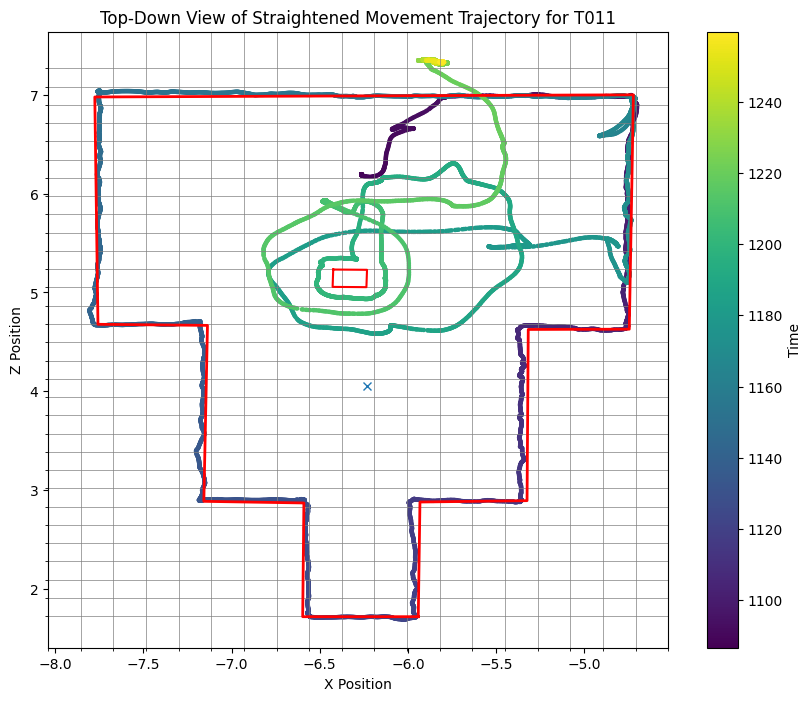

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope= dz/dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    #adjusted_angle = 90 - angle_deg
    return np.radians(-angle_deg)

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final

def plot_movement_trajectory_with_layout(file_path):
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.77, 2.82), (-6.32, 2.68),
        (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
        (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),  
    ]

    def draw_elevated_platform(ax, angle, center_x, center_z):
        rotated_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)
        
        center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
        ax.plot(center_x_rotated, center_z_rotated, 'x')

        #pillar_coords = [ (-6.11, 4.90), (-6.32, 5.08), (-6.20, 5.24), (-5.98, 5.16)]

        pillar_coords = [
        (-6.26, 5.14),  # Start here
        (-6.075, 5.19),  # Move right and slightly up
        (-6.03, 5.02),  # Move slightly right and down
        (-6.215, 4.97)   # Move left and slightly down to complete the shape
        ]
        rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
        rotated_pillar.append(rotated_pillar[0])
        pxs, pzs = zip(*rotated_pillar)
        ax.plot(pxs, pzs, 'r-')

        pillar_coords = np.array(pillar_coords)
        pillar_size = np.abs(pillar_coords[0] - pillar_coords[1]).max()

        x_min, x_max = np.min(pos_x), np.max(pos_x)
        z_min, z_max = np.min(pos_z), np.max(pos_z)

        x_grid = np.arange(x_min, x_max, pillar_size)
        z_grid = np.arange(z_min, z_max, pillar_size)
        ax.set_xticks(x_grid, minor=True)
        ax.set_yticks(z_grid, minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

        area_covered = calculate_area_covered(pos_x, pos_z, x_grid, z_grid)
        print(f"Area covered: {area_covered:.2f}%")

    def calculate_area_covered(pos_x, pos_z, x_grid, z_grid):
        squares_covered = np.zeros((len(z_grid)-1, len(x_grid)-1), dtype=bool)
        for i in range(len(pos_x) - 1):
            x1, z1 = pos_x[i], pos_z[i]
            x2, z2 = pos_x[i+1], pos_z[i+1]
            x_idx1, x_idx2 = np.searchsorted(x_grid, [x1, x2])
            z_idx1, z_idx2 = np.searchsorted(z_grid, [z1, z2])
            if x_idx1 == x_idx2:
                squares_covered[min(z_idx1, z_idx2):max(z_idx1, z_idx2)+1, x_idx1-1:x_idx1+1] = True
            elif z_idx1 == z_idx2:
                squares_covered[z_idx1-1:z_idx1+1, min(x_idx1, x_idx2):max(x_idx1, x_idx2)+1] = True
            else:
                squares_covered[min(z_idx1, z_idx2):max(z_idx1, z_idx2)+1, min(x_idx1, x_idx2):max(x_idx1, x_idx2)+1] = True
        total_squares = (len(z_grid) - 1) * (len(x_grid) - 1)
        covered_squares = np.sum(squares_covered)
        percentage_covered = (covered_squares / total_squares) * 100
        return percentage_covered

    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)

    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)

    if scene_id == 'T011':
        draw_elevated_platform(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T003':
        draw_training_room(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

def draw_training_room(ax, angle, center_x, center_z):
    
    platform_coords = [
        (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
    ]
    rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
    rotated_coords.append(rotated_coords[0])
    xs, zs = zip(*rotated_coords)
    ax.plot(xs, zs, 'r-', linewidth=2)

def draw_empty_room(ax):
    # No specific elements to draw for an empty room
    pass

def draw_dark_maze_room(ax):
    # Placeholder for dark maze room drawing
    # You would add specific maze elements here
    pass

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\BEA_edges_11.09.24\S001\trackers\camera_movement_T011.csv')

Calculated tilt angle: -15.95 degrees
Total area covered: 43.30%
Green area covered: 61.11%


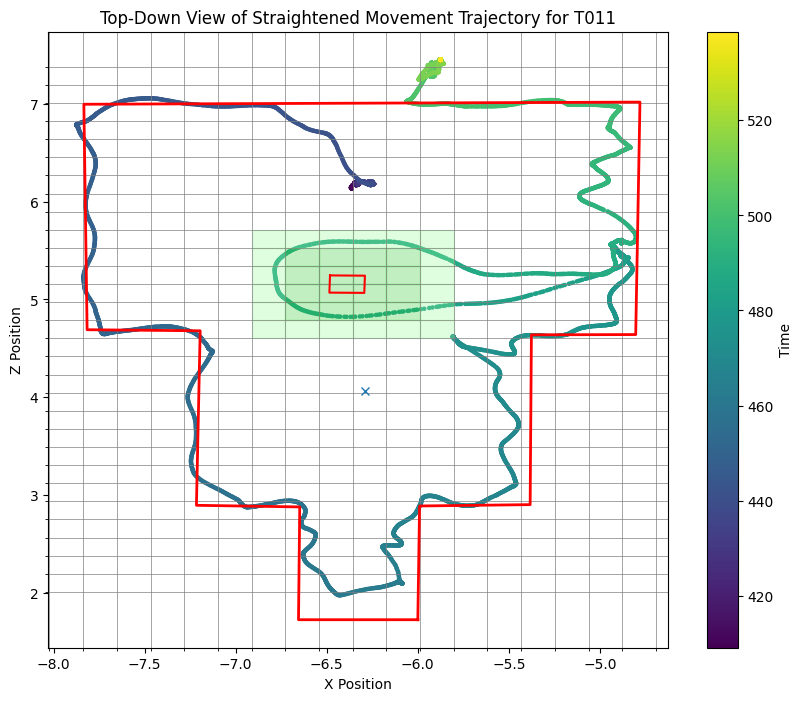

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope= dz/dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    return np.radians(-angle_deg)

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final

def plot_movement_trajectory_with_layout(file_path):
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.77, 2.82), (-6.32, 2.68),
        (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
        (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),  
    ]

    def draw_elevated_platform(ax, angle, center_x, center_z):
        rotated_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)
        
        center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
        ax.plot(center_x_rotated, center_z_rotated, 'x')

        pillar_coords = [
        (-6.26, 5.14),  # Start here
        (-6.075, 5.19),  # Move right and slightly up
        (-6.03, 5.02),  # Move slightly right and down
        (-6.215, 4.97)   # Move left and slightly down to complete the shape
        ]
        rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
        rotated_pillar.append(rotated_pillar[0])
        pxs, pzs = zip(*rotated_pillar)
        ax.plot(pxs, pzs, 'r-')

        pillar_coords = np.array(pillar_coords)
        pillar_size = np.abs(pillar_coords[0] - pillar_coords[1]).max()

        x_min, x_max = np.min(pos_x), np.max(pos_x)
        z_min, z_max = np.min(pos_z), np.max(pos_z)

        x_grid = np.arange(x_min, x_max, pillar_size)
        z_grid = np.arange(z_min, z_max, pillar_size)
        ax.set_xticks(x_grid, minor=True)
        ax.set_yticks(z_grid, minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

        pillar_center = np.mean(pillar_coords, axis=0)
        pillar_center_rotated = rotate_points(pillar_center[0], pillar_center[1], -angle, center_x, center_z)
        
        green_squares = highlight_adjacent_squares(ax, pillar_center_rotated, x_grid, z_grid, pillar_size)
        
        area_covered, green_area_covered = calculate_area_covered(pos_x, pos_z, x_grid, z_grid, green_squares)
        print(f"Total area covered: {area_covered:.2f}%")
        print(f"Green area covered: {green_area_covered:.2f}%")

    def highlight_adjacent_squares(ax, pillar_center, x_grid, z_grid, pillar_size):
        pillar_x_idx = np.searchsorted(x_grid, pillar_center[0])
        pillar_z_idx = np.searchsorted(z_grid, pillar_center[1])
        
        green_squares = []
        for i in range(-3, 3):  # Range from -3 to 2 (6x6 grid)
            for j in range(-3, 3):  # Range from -3 to 2 (6x6 grid)
                if -2 <= i <= 1 and -2 <= j <= 1:
                    color = 'limegreen'  # 4x4 center grid
                else:
                    color = 'palegreen'  # Outer squares of 5x5 grid  # Outer squares of 5x5 grid
                
                x = x_grid[pillar_x_idx + i]
                z = z_grid[pillar_z_idx + j]
                rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color=color, alpha=0.3)
                ax.add_patch(rect)
                green_squares.append((pillar_x_idx + i, pillar_z_idx + j))
        
        return green_squares

    def calculate_area_covered(pos_x, pos_z, x_grid, z_grid, green_squares):
        squares_covered = np.zeros((len(z_grid)-1, len(x_grid)-1), dtype=bool)
        for i in range(len(pos_x) - 1):
            x1, z1 = pos_x[i], pos_z[i]
            x2, z2 = pos_x[i+1], pos_z[i+1]
            x_idx1, x_idx2 = np.searchsorted(x_grid, [x1, x2])
            z_idx1, z_idx2 = np.searchsorted(z_grid, [z1, z2])
            if x_idx1 == x_idx2:
                squares_covered[min(z_idx1, z_idx2):max(z_idx1, z_idx2)+1, x_idx1-1:x_idx1+1] = True
            elif z_idx1 == z_idx2:
                squares_covered[z_idx1-1:z_idx1+1, min(x_idx1, x_idx2):max(x_idx1, x_idx2)+1] = True
            else:
                squares_covered[min(z_idx1, z_idx2):max(z_idx1, z_idx2)+1, min(x_idx1, x_idx2):max(x_idx1, x_idx2)+1] = True
        
        total_squares = (len(z_grid) - 1) * (len(x_grid) - 1)
        covered_squares = np.sum(squares_covered)
        percentage_covered = (covered_squares / total_squares) * 100

        green_covered = sum(squares_covered[z, x] for x, z in green_squares)
        green_percentage_covered = (green_covered / len(green_squares)) * 100
        
        return percentage_covered, green_percentage_covered

    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)

    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)

    if scene_id == 'T011':
        draw_elevated_platform(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T003':
        draw_training_room(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

def draw_training_room(ax, angle, center_x, center_z):
    platform_coords = [
        (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
    ]
    rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
    rotated_coords.append(rotated_coords[0])
    xs, zs = zip(*rotated_coords)
    ax.plot(xs, zs, 'r-', linewidth=2)

def draw_empty_room(ax):
    pass

def draw_dark_maze_room(ax):
    pass

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\vr\pilotdatavr2\camera_movement_T011.csv')

In [35]:

def pixel_to_cartesian(pixel_coords, image_coords, real_coords):
    # Extract x and y coordinates from image_coords and real_coords
    image_x = image_coords[:, 0]
    image_y = image_coords[:, 1]
    real_x = real_coords[:, 0]
    real_y = real_coords[:, 1]

    # Calculate the coefficients for the linear transformation
    coefficients = np.polyfit(image_x, real_x, 1)
    a_x = coefficients[0]
    b_x = coefficients[1]

    coefficients = np.polyfit(image_y, real_y, 1)
    a_y = coefficients[0]
    b_y = coefficients[1]

    # Convert pixel coordinates to cartesian coordinates
    px, py = pixel_coords
    cx = a_x * px + b_x
    cy = a_y * py + b_y

    cx = round(cx, 2)
    cy = round(cy, 2)

    return cx, cy

In [36]:
real_coords = np.array([
    [-8.90, 8.21],
    [-5.39, 9.03],
    [-7.03, 0.97],
    [-3.56, 1.81]
])

image_coords = np.array([
    [298, 192],
    [554, 127],
    [434, 720],
    [689, 653]
])

In [12]:
pixel_coords=(586.30, 496.99)
# Convert pixel coordinates to cartesian coordinates
cartesian_coords = pixel_to_cartesian(pixel_coords, image_coords, real_coords)

print("Cartesian Coordinates:", cartesian_coords)

Cartesian Coordinates: (-4.96, 3.99)


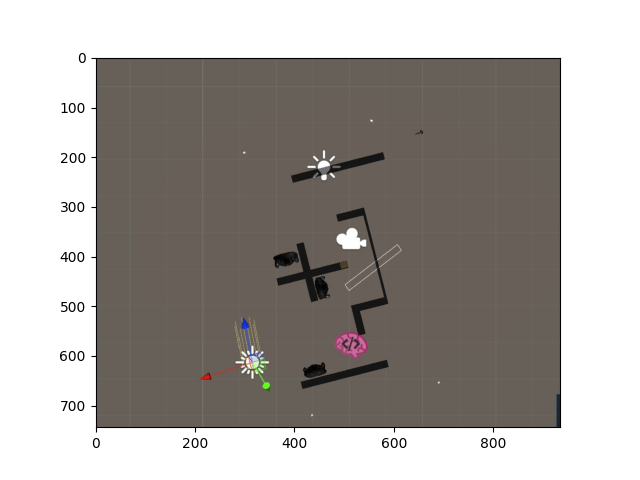

Clicked coordinates: Pixel - (481.2184304010572, 400.8657289322333), Cartesian - (-6.39, 5.31)
Clicked coordinates: Pixel - (490.54038648292646, 412.85021127680596), Cartesian - (-6.26, 5.14)
Clicked coordinates: Pixel - (504.27525305778477, 409.65928267860653), Cartesian - (-6.08, 5.19)
Clicked coordinates: Pixel - (492.66767221505944, 425.4751896435949), Cartesian - (-6.23, 4.97)
Clicked coordinates: Pixel - (507.4199363139813, 421.40559954734056), Cartesian - (-6.03, 5.03)


In [62]:
def on_mouse_click(event):
    if event.button == 1:  # Left mouse 
        x, y = event.xdata, event.ydata
        cartesian_coords = pixel_to_cartesian((x,y), image_coords, real_coords)
        ax.scatter(x, y, color='red')
        ax.text(x, y, f'{cartesian_coords}', fontsize=12, color='red')
        print(f"Clicked coordinates: Pixel - {x,y}, Cartesian - {cartesian_coords}")

# Load the image
image = plt.imread(r"C:\Users\lal\Pictures\Unbenannt.png")

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Connect the mouse click event to the callback function
fig.canvas.mpl_connect('button_press_event', on_mouse_click)

# Show the plot
plt.show()